In [ ]:
STUDENT:EVALYNE WAIRIMU KIARIE
    ID:17G01ABT008

In [ ]:
#CSC 423 Class project on  Sentiment Analyzer: Analyze sentiments behind a phrase
This data is collected and cleaned

# collect data


In [2]:
pip install --upgrade tweepy


Requirement already up-to-date: tweepy in c:\users\owner\anaconda3\lib\site-packages (4.13.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy

# Authentication
consumerKey = "smnegPeIOBfdnaDBZNmU0qLPo"
consumerSecret = "yVlbDlnDP6f3oC0Z94yY3ZHRnqH2piAxRQLKTst3jgsHXrdZuz"
accessToken = "1246515307390230528-2yIYcHhAYUTI2zwAdUTE9OX4IWKfPl"
accessTokenSecret = "2ETXWWxdRgMq0oad68Z98Njy63ObXKRqtEZmJ9MhekFga"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)



In [4]:
import tweepy
import pandas as pd
from textblob import TextBlob
import time
#cleaning the data
import string

api = tweepy.API(auth)

#defining a method to analysze data
def clean_tweet_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Sentiment Analysis function
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# User inputs
keyword = input("Please enter keyword or hashtag to search:")
noOfTweet = int(input("Please enter how many tweets to analyze:"))

# Create a list of dictionaries to store the tweets' information
tweets = []
for tweet in tweepy.Cursor(api.search_tweets, q=keyword, lang="en").items(noOfTweet):
    try:
        tweet_dict = {}
        tweet_dict['Created At'] = tweet.created_at
        tweet_dict['Tweet Text'] = tweet.text
        tweet_dict['Sentiment'] = get_sentiment(tweet.text)
        tweets.append(tweet_dict)
    except tweepy.TweepError:
        print("Error occurred, waiting for 15 minutes...")
        time.sleep(15 * 60)

# Create a pandas dataframe to store and manipulate the data
df = pd.DataFrame(tweets)

# Print the sentiment value counts
print(df['Sentiment'].value_counts())

# Save the dataframe to a csv file
df.to_csv('tweets.csv', index=False)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Please enter keyword or hashtag to search:all is fair in love and war
Please enter how many tweets to analyze:200
Sentiment
Positive    169
Neutral      16
Negative     15
Name: count, dtype: int64


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('tweets.csv')

# Print the DataFrame
print(df)


                    Created At   
0    2023-04-21 09:48:13+00:00  \
1    2023-04-21 08:01:50+00:00   
2    2023-04-21 06:43:27+00:00   
3    2023-04-21 06:20:29+00:00   
4    2023-04-21 06:00:55+00:00   
..                         ...   
195  2023-04-17 13:06:52+00:00   
196  2023-04-17 13:04:03+00:00   
197  2023-04-17 13:00:55+00:00   
198  2023-04-17 13:00:01+00:00   
199  2023-04-17 12:54:01+00:00   

                                            Tweet Text Sentiment  
0    @FightHaven FAFO. All is fair in love and war....  Positive  
1    just realized by saying "it was war, it wasn't...  Positive  
2    @_Two21B @papi_uteh @oduwolebayo All is fair i...  Positive  
3    Spouses of politicians are off limits\n\nUnles...  Positive  
4    @GoIdenState Only star players are being ejacu...  Positive  
..                                                 ...       ...  
195  RT @lydiamchan1213: All is fair in love and wa...  Positive  
196  RT @lydiamchan1213: All is fair in love and wa... 

# human anotators

In [6]:
from textblob import TextBlob

# Sample text to analyze
text = "Those who’ve been brutalized by Russia’s illegal war deserve justice, which is why efforts are already"

# Create a TextBlob object
blob = TextBlob(text)

# Get the sentiment polarity (-1 to 1) and subjectivity (0 to 1)
sentiment_polarity = blob.sentiment.polarity

subjectivity = blob.sentiment.subjectivity

# Print the sentiment label based on the polarity
if sentiment_polarity > 0:
    sentiment_label = "Positive"
elif sentiment_polarity == 0:
    sentiment_label = "Neutral"
else:
    sentiment_label = "Negative"

# Print the results
print(f"Text: {text}")
print(f"Sentiment polarity: {sentiment_polarity:.2f}")
print(f"Subjectivity: {subjectivity:.2f}")
print(f"Sentiment label: {sentiment_label}")


Text: Those who’ve been brutalized by Russia’s illegal war deserve justice, which is why efforts are already
Sentiment polarity: -0.50
Subjectivity: 0.50
Sentiment label: Negative


# data cleaning

In [8]:
df['Tweet Text'] = df['Tweet Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [9]:
df

,Created At,Tweet Text,Sentiment
0,2023-04-21 09:48:13+00:00,FightHaven FAFO All is fair in love and war An...,Positive
1,2023-04-21 08:01:50+00:00,just realized by saying it was war it wasnt fa...,Positive
2,2023-04-21 06:43:27+00:00,Two21B papiuteh oduwolebayo All is fair in lov...,Positive
3,2023-04-21 06:20:29+00:00,Spouses of politicians are off limits\n\nUnles...,Positive
4,2023-04-21 06:00:55+00:00,GoIdenState Only star players are being ejacul...,Positive
...,...,...,...
195,2023-04-17 13:06:52+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
196,2023-04-17 13:04:03+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
197,2023-04-17 13:00:55+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
198,2023-04-17 13:00:01+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive


In [10]:
#removing emojis
import re
import emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Tweet Text'] = df['Tweet Text'].apply(remove_emoji)

In [11]:
df

,Created At,Tweet Text,Sentiment
0,2023-04-21 09:48:13+00:00,FightHaven FAFO All is fair in love and war An...,Positive
1,2023-04-21 08:01:50+00:00,just realized by saying it was war it wasnt fa...,Positive
2,2023-04-21 06:43:27+00:00,Two21B papiuteh oduwolebayo All is fair in lov...,Positive
3,2023-04-21 06:20:29+00:00,Spouses of politicians are off limits\n\nUnles...,Positive
4,2023-04-21 06:00:55+00:00,GoIdenState Only star players are being ejacul...,Positive
...,...,...,...
195,2023-04-17 13:06:52+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
196,2023-04-17 13:04:03+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
197,2023-04-17 13:00:55+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive
198,2023-04-17 13:00:01+00:00,RT lydiamchan1213 All is fair in love and war\...,Positive


In [12]:
#convert to lowercase
df['Tweet Text'] = df['Tweet Text'].str.lower()

In [13]:
df

,Created At,Tweet Text,Sentiment
0,2023-04-21 09:48:13+00:00,fighthaven fafo all is fair in love and war an...,Positive
1,2023-04-21 08:01:50+00:00,just realized by saying it was war it wasnt fa...,Positive
2,2023-04-21 06:43:27+00:00,two21b papiuteh oduwolebayo all is fair in lov...,Positive
3,2023-04-21 06:20:29+00:00,spouses of politicians are off limits\n\nunles...,Positive
4,2023-04-21 06:00:55+00:00,goidenstate only star players are being ejacul...,Positive
...,...,...,...
195,2023-04-17 13:06:52+00:00,rt lydiamchan1213 all is fair in love and war\...,Positive
196,2023-04-17 13:04:03+00:00,rt lydiamchan1213 all is fair in love and war\...,Positive
197,2023-04-17 13:00:55+00:00,rt lydiamchan1213 all is fair in love and war\...,Positive
198,2023-04-17 13:00:01+00:00,rt lydiamchan1213 all is fair in love and war\...,Positive


In [14]:
#tokenize text
import nltk
nltk.download('punkt')

df['Tweet Text'] = df['Tweet Text'].apply(lambda x: nltk.word_tokenize(x.lower()))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df

,Created At,Tweet Text,Sentiment
0,2023-04-21 09:48:13+00:00,"[fighthaven, fafo, all, is, fair, in, love, an...",Positive
1,2023-04-21 08:01:50+00:00,"[just, realized, by, saying, it, was, war, it,...",Positive
2,2023-04-21 06:43:27+00:00,"[two21b, papiuteh, oduwolebayo, all, is, fair,...",Positive
3,2023-04-21 06:20:29+00:00,"[spouses, of, politicians, are, off, limits, u...",Positive
4,2023-04-21 06:00:55+00:00,"[goidenstate, only, star, players, are, being,...",Positive
...,...,...,...
195,2023-04-17 13:06:52+00:00,"[rt, lydiamchan1213, all, is, fair, in, love, ...",Positive
196,2023-04-17 13:04:03+00:00,"[rt, lydiamchan1213, all, is, fair, in, love, ...",Positive
197,2023-04-17 13:00:55+00:00,"[rt, lydiamchan1213, all, is, fair, in, love, ...",Positive
198,2023-04-17 13:00:01+00:00,"[rt, lydiamchan1213, all, is, fair, in, love, ...",Positive


In [16]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Tweet Text'] = df['Tweet Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df

,Created At,Tweet Text,Sentiment
0,2023-04-21 09:48:13+00:00,"[fighthaven, fafo, fair, love, war, society, f...",Positive
1,2023-04-21 08:01:50+00:00,"[realized, saying, war, wasnt, fair, great, wa...",Positive
2,2023-04-21 06:43:27+00:00,"[two21b, papiuteh, oduwolebayo, fair, love, war🤧]",Positive
3,2023-04-21 06:20:29+00:00,"[spouses, politicians, limits, unless, insert,...",Positive
4,2023-04-21 06:00:55+00:00,"[goidenstate, star, players, ejaculated, adam,...",Positive
...,...,...,...
195,2023-04-17 13:06:52+00:00,"[rt, lydiamchan1213, fair, love, war, dlthepro...",Positive
196,2023-04-17 13:04:03+00:00,"[rt, lydiamchan1213, fair, love, war, dlthepro...",Positive
197,2023-04-17 13:00:55+00:00,"[rt, lydiamchan1213, fair, love, war, dlthepro...",Positive
198,2023-04-17 13:00:01+00:00,"[rt, lydiamchan1213, fair, love, war, dlthepro...",Positive


In [18]:
#change to paragraph to check the data
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv('tweets.csv')

# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert emojis to text
    text = emoji.demojize(text)
    # Remove emoji characters
    text = re.sub(r':[a-z_]+:', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Apply text preprocessing to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(preprocess_text)

# Concatenate tweet text column into a single paragraph
paragraph = ' '.join(df['Tweet Text'].tolist())
print(paragraph)


fafo fair love war society facing war nice elbow hyperextension would realized saying war wasnt fair great war taylor alluding saying fair love war like fair love war spouses politicians limits unless insert game fair love war star players ejaculated adam silver must intervene pronto say fair love war ejaculation fair love war indigenous egged war rest australia albaneses blunder fair love war alas foul cec rtd sunil aroraamp cjis lodha dattu thakur dipak g shawty disrespected love amp trust since first day met nerve try kick im performative shit running writing articles otherwise fair love war alls fair love war war war war ever heard maxim fair love war fair love war rt standard media run story wall wall thought fair love war screamingggggggg furthermore ya may hear push anudda dont scared good fair love war say nah usno typo fair love war fair love war putin feeding people death machine fair love war oh believe someone told fair love war fair love war fair love war kissing nose fair

In [19]:
#stem the data
from nltk.stem import PorterStemmer

# Define function to apply Porter stemming to a string
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

# Apply Porter stemming to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(stem_text)


In [20]:
# Display a sample of the stemmed data
print(df['Tweet Text'].sample(10))


183                  fair love war dont moan palestinian
11                                         fair love war
112                         back stab betray cryptic wor
24     thing mean guess okay long man standard all fa...
92     someth got ta give yall got ta stop fair love war
43     point lol dillon brook match lbj nba playoff g...
18                                         fair love war
98     could lead similar act izra all fair love war war
25          say fair love war contract negoti hope mount
134                      fair love war cant fight anymor
Name: Tweet Text, dtype: object


In [21]:
#lemetized text
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download WordNet lemmatizer
import nltk
nltk.download('wordnet')

df = pd.read_csv('tweets.csv')

# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
     # Convert emojis to text
    text = emoji.demojize(text)
    # Remove emoji characters
    text = re.sub(r':[a-z_]+:', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Apply text preprocessing to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(preprocess_text)

# Display a sample of the lemmatized data
print(df['Tweet Text'].sample(10))
#save in a new file
df.to_csv('preprocessed_tweets.csv', index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


175    crocodile tear escapade date convinced agenda ...
3      spouse politician limit unless insert game fai...
62                   standard medium run story wall wall
70     seen tweet went man eating saying tasted good ...
88     rt fair love warespecially love also official ...
104                 fair love war dug grave dont bite th
41     rt taizi dianxia crown prince hanye came slow ...
43     point lol dillon brook matched lbj nba playoff...
124                                        fair love war
12                rt standard medium run story wall wall
Name: Tweet Text, dtype: object


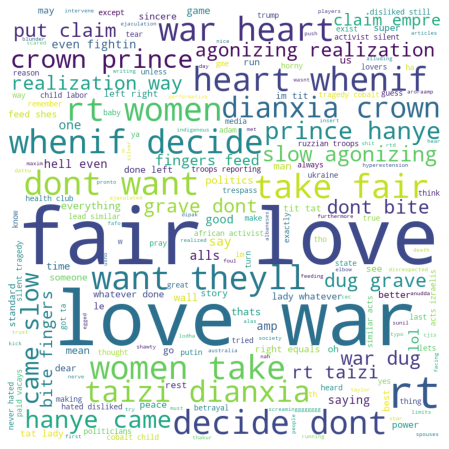

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from processed text data
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(paragraph)

# Display the generated wordcloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [23]:
import gensim
from gensim import corpora
from gensim.similarities import Similarity


with open('preprocessed_tweets.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()

new_lines = []
for line in lines:
    if not re.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\+00:00,rt war word nonstop,', line):
        new_lines.append(line)

with open('fully_processs.csv', 'w', encoding='utf-8') as f:
    f.writelines(new_lines)


# Feature extraction: Creating features from the text data that can be used to train a machine 
learning model. For example, features could be the frequency of specific words, the length 
of the text, or the sentiment of the words.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Read in the text file
with open('fully_processs.csv', 'r') as f:
    text_data = f.readlines()

# Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform the text data
text_vectors = vectorizer.fit_transform(text_data)

# Print the sparse matrix of text vectors
print(text_vectors)


  (0, 487)	0.45357210651180985
  (0, 545)	0.45357210651180985
  (0, 575)	0.42081988638580003
  (0, 92)	0.45357210651180985
  (0, 153)	0.45357210651180985
  (1, 425)	0.07002856179071217
  (1, 618)	0.2939767596199875
  (1, 286)	0.33537665111852544
  (1, 193)	0.33537665111852544
  (1, 386)	0.33537665111852544
  (1, 213)	0.33537665111852544
  (1, 502)	0.33537665111852544
  (1, 596)	0.1558074983205386
  (1, 338)	0.07478003508996654
  (1, 216)	0.07516168123295883
  (1, 215)	0.33537665111852544
  (1, 0)	0.12004766550510125
  (1, 13)	0.1921565574603299
  (1, 49)	0.24554199149884898
  (1, 9)	0.22357873978914186
  (1, 22)	0.17167335290458982
  (1, 4)	0.060023832752550625
  (1, 21)	0.060023832752550625
  (2, 328)	0.22231019567098714
  (2, 73)	0.2951879540203552
  :	:
  (198, 4)	0.13615540867739645
  (198, 21)	0.13615540867739645
  (199, 17)	0.29087196221739425
  (199, 468)	0.3434543405348562
  (199, 1)	0.5249229347736499
  (199, 425)	0.1609725049271808
  (199, 596)	0.17907495634460574
  (199, 338

In [64]:
df.columns

Index(['Created At', 'Tweet Text', 'Sentiment'], dtype='object')

# Training the model: Using a machine learning algorithm such as a Naive Bayes or Support 
Vector Machine (SVM) to train a model to classify the text into one of the three sentiment 
categories

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Read the data into a Pandas DataFrame
df = pd.read_csv('sheet.csv')

# Split the data into training and testing sets
train_data = df['Tweet Text'][:8]
test_data = df['Tweet Text'][8:]
train_labels = df['Sentiment'][:8]
test_labels = df['Sentiment'][8:]

# Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform the training data
train_vectors = vectorizer.fit_transform(train_data)

# Transform the testing data using the same vectorizer
test_vectors = vectorizer.transform(test_data)

# Train a Naive Bayes classifier on the training vectors and labels
nb = MultinomialNB()
nb.fit(train_vectors, train_labels)

# Evaluate the performance of the classifier on the testing vectors and labels
accuracy = nb.score(test_vectors, test_labels)
print('Accuracy:', accuracy)


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Accuracy: 0.8043478260869565


In [7]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model on the training vectors and labels
nb_model = MultinomialNB().fit(train_vectors, train_labels)

# Evaluate the performance of the model on the testing vectors and labels
accuracy = nb_model.score(test_vectors, test_labels)
print("Accuracy:", accuracy)


Accuracy: 0.8043478260869565


# Evaluating the model Assessing the accuracy and performance of the model using a separate test dataset

In [8]:
from sklearn.metrics import accuracy_score

# predict labels for test dataset
test_predictions = nb_model.predict(test_vectors)

# calculate accuracy of predictions
accuracy = accuracy_score(test_labels, test_predictions)

print("Accuracy:", accuracy)


Accuracy: 0.8043478260869565


In [9]:
from sklearn.metrics import precision_recall_fscore_support


# Predict the labels of the test data using the trained model
test_predictions = nb_model.predict(test_vectors)

# Compute the accuracy of the model on the test data
accuracy = accuracy_score(test_labels, test_predictions)

# Compute the precision, recall, and F1-score of the model on the test data
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')


# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)


Accuracy: 0.8043478260869565
Precision: 0.6469754253308129
Recall: 0.8043478260869565
F1-score: 0.7171293871136721


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Deploying the model: Using the trained model to classify new text data in real-time.


In [29]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install --upgrade scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\owner\anaconda3\lib\site-packages (1.2.2)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pickle

# train your model
# ...

# save your model
with open('model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# load your model
with open('model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

# use your model to make predictions
# ...


In [14]:
import pickle

# load the saved model
with open('model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

# classify new text data
new_text = "all is fair in love and war."
new_text_vector = vectorizer.transform([new_text])
prediction = nb_model.predict(new_text_vector)

# print the predicted class
print(prediction)

['Positive']
